<a href="https://colab.research.google.com/github/TayoDS/Cyclistic/blob/main/Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# List of file paths
file_paths = glob.glob("/content/drive/My Drive/DS/2021_*.csv")

In [7]:
# Initialize an empty list to hold individual DataFrames
dataframes = []

# Loop through the file paths and read each CSV into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [8]:
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a CSV file
merged_df.to_csv("merged_data_2021.csv", index=False)

print("Merging and saving complete.")

Merging and saving complete.


In [9]:

# Read the merged dataset
merged_df = pd.read_csv("merged_data_2021.csv")

# Display the first five rows of the merged dataset
print(merged_df.head())

            ride_id rideable_type           started_at             ended_at  \
0  CFA86D4455AA1030  classic_bike  2021-03-16 08:32:30  2021-03-16 08:36:34   
1  30D9DC61227D1AF3  classic_bike  2021-03-28 01:26:28  2021-03-28 01:36:55   
2  846D87A15682A284  classic_bike  2021-03-11 21:17:29  2021-03-11 21:33:53   
3  994D05AA75A168F2  classic_bike  2021-03-11 13:26:42  2021-03-11 13:55:41   
4  DF7464FBE92D8308  classic_bike  2021-03-21 09:09:37  2021-03-21 09:27:33   

             start_station_name start_station_id  \
0  Humboldt Blvd & Armitage Ave            15651   
1  Humboldt Blvd & Armitage Ave            15651   
2         Shields Ave & 28th Pl            15443   
3   Winthrop Ave & Lawrence Ave     TA1308000021   
4      Glenwood Ave & Touhy Ave              525   

                      end_station_name end_station_id  start_lat  start_lng  \
0              Stave St & Armitage Ave          13266  41.917513 -87.701809   
1  Central Park Ave & Bloomingdale Ave          18017 

In [10]:
merged_df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5595058,7ED482EE6C9F5DB2,classic_bike,2021-02-20 15:25:32,2021-02-20 15:59:45,Western Ave & Leland Ave,TA1307000140,NaN,NaN,41.966495,-87.688419,41.95000,-87.660000,member
5595059,203DF22F090C1777,classic_bike,2021-02-09 08:54:38,2021-02-09 09:08:19,Franklin St & Chicago Ave,13017,NaN,NaN,41.896747,-87.635668,NaN,NaN,member
5595060,940161523673F056,docked_bike,2021-02-27 14:46:06,2021-02-27 15:00:49,Franklin St & Chicago Ave,13017,Michigan Ave & Oak St,13042,41.896747,-87.635668,41.90096,-87.623777,casual
5595061,C5538FFA492A7B00,classic_bike,2021-02-09 11:44:17,2021-02-09 11:46:13,Franklin St & Chicago Ave,13017,Wells St & Walton St,TA1306000011,41.896747,-87.635668,41.89993,-87.634430,member
5595062,EB4CA525B953E123,electric_bike,2021-02-04 10:26:44,2021-02-04 10:31:21,Franklin St & Chicago Ave,13017,NaN,NaN,41.896743,-87.635678,41.90000,-87.650000,member


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [12]:
merged_df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01
std,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01


In [13]:
merged_df.shape

(5595063, 13)

**Treating Missing values**

In [14]:
merged_df.dropna(axis=0, inplace=True)



In [15]:
merged_df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [16]:
merged_df[merged_df.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


Let's convert columns 'started_at' and 'ended_at' to 'datetime' Datatype.

In [17]:
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'], dayfirst = True)
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'], dayfirst = True)

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588302 entries, 0 to 5595061
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 490.1+ MB


Now, we will start creating new columns for 'Hour', 'Day' and 'Month'.

In [19]:
merged_df['Hour'] = merged_df.started_at.apply(lambda x: x.hour)

In [20]:
merged_df['Day'] = merged_df.started_at.apply(lambda x: x.day_name())

In [21]:
merged_df['Month'] = merged_df.started_at.apply(lambda x: x.month)

In [22]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,8,Tuesday,3
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,1,Sunday,3
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,21,Thursday,3
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,13,Thursday,3
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,9,Sunday,3


Let's calculate 'Total_Ride_Time' in minutes.

In [26]:
import datetime as datetime
from datetime import timedelta

In [23]:
merged_df['Total_Ride_Time'] = (merged_df['ended_at'] - merged_df['started_at'])

In [27]:
merged_df['Total_Ride_Time'] = (merged_df['Total_Ride_Time'])/timedelta(minutes=1)

In [28]:
merged_df['Total_Ride_Time'] = merged_df['Total_Ride_Time'].round(decimals = 1)

In [29]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,8,Tuesday,3,4.1
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,1,Sunday,3,10.4
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,21,Thursday,3,16.4
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,13,Thursday,3,29.0
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,9,Sunday,3,17.9


Let's calculate the ride distance in Kms from given coordinates.

In [30]:
merged_df['Lat'] = (merged_df['end_lat'] - merged_df['start_lat'])

In [31]:
merged_df['Lng'] = (merged_df['end_lng']) - merged_df['start_lng']

In [32]:
import math

In [33]:
import numpy as np

In [34]:
merged_df['Distance'] = np.sqrt((merged_df['Lat']** 2) + (merged_df['Lng'] ** 2))

In [35]:
merged_df['Distance'] = merged_df['Distance'] * 111

In [36]:
merged_df['Distance'].head()

0    1.156558
1    1.700110
2    1.864598
3    1.967226
4    4.393206
Name: Distance, dtype: float64

In [37]:
merged_df['Distance'] = merged_df['Distance'].round(decimals = 2)

In [38]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,8,Tuesday,3,4.1,0.000228,0.010417,1.16
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,1,Sunday,3,10.4,-0.003347,-0.014946,1.70
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,21,Thursday,3,16.4,-0.012072,-0.011681,1.86
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,13,Thursday,3,29.0,-0.015979,0.007666,1.97
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,9,Sunday,3,17.9,0.037790,-0.011763,4.39


In [39]:
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [40]:
merged_df['Month_Name'] = merged_df['Month'].map(month)

In [41]:
merged_df['Month_Name'].head()

0    March
1    March
2    March
3    March
4    March
Name: Month_Name, dtype: object

**EDA**

In [42]:
import seaborn as sns
sns.set_style('whitegrid')

In [43]:
merged_df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance,Month_Name
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,...,-87.691392,casual,8,Tuesday,3,4.1,0.000228,0.010417,1.16,March
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,...,-87.716755,casual,1,Sunday,3,10.4,-0.003347,-0.014946,1.70,March
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,...,-87.647172,casual,21,Thursday,3,16.4,-0.012072,-0.011681,1.86,March


<Axes: xlabel='member_casual', ylabel='Distance'>

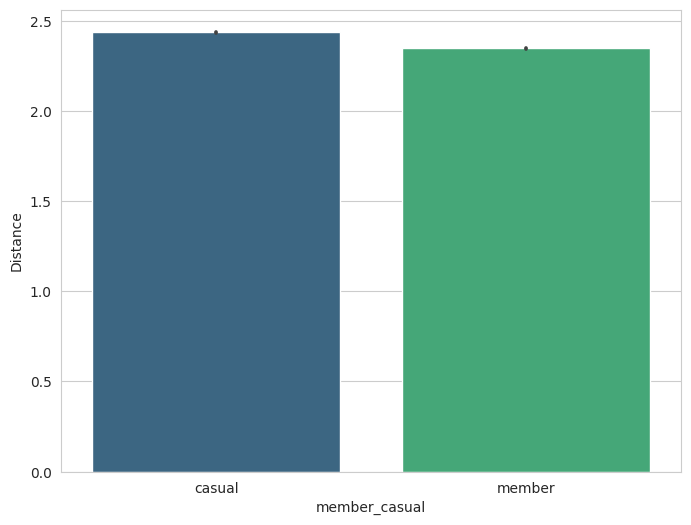

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Distance', data=merged_df, palette='viridis')

<Axes: xlabel='member_casual', ylabel='Total_Ride_Time'>

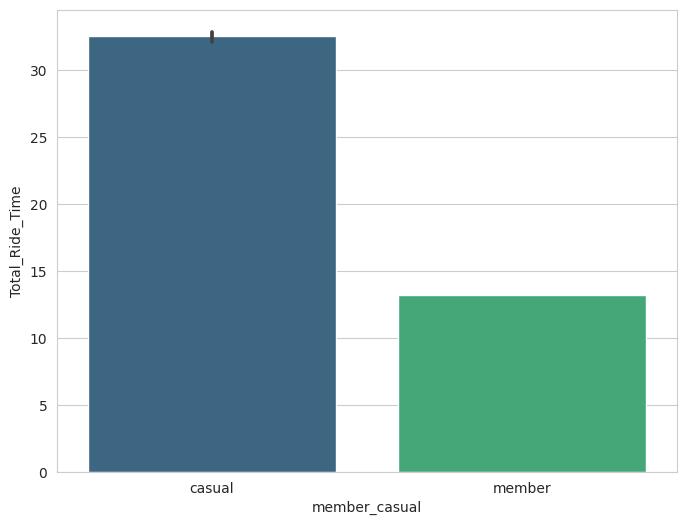

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Total_Ride_Time', data=merged_df, palette='viridis')

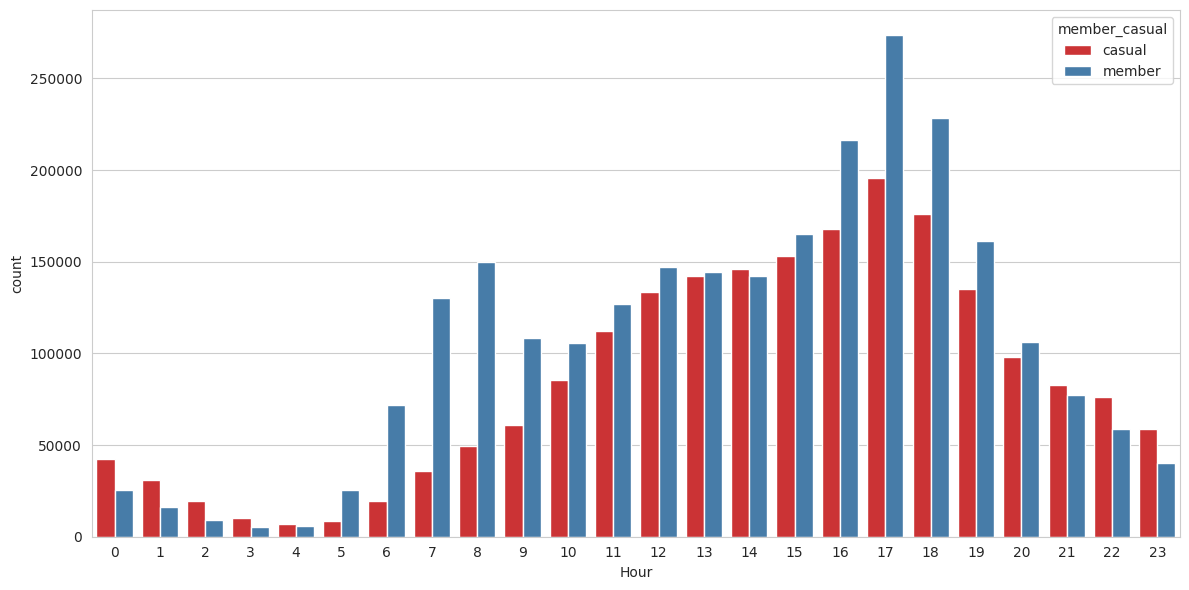

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='member_casual', data=merged_df, palette='Set1')
plt.tight_layout()

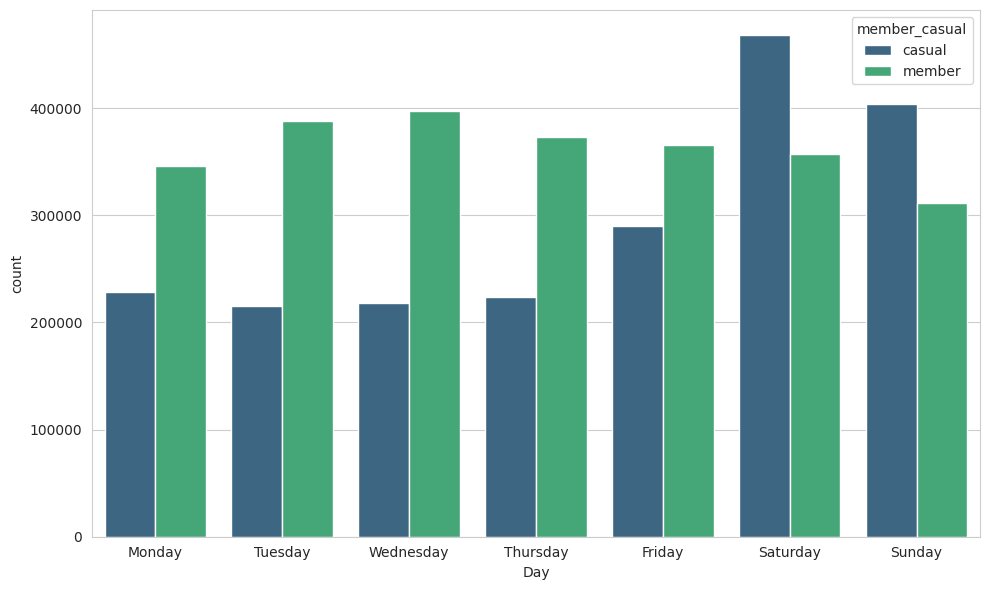

In [47]:
plt.figure(figsize=(10,6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='Day', hue='member_casual', data=merged_df, palette='viridis', order=order)
plt.tight_layout()

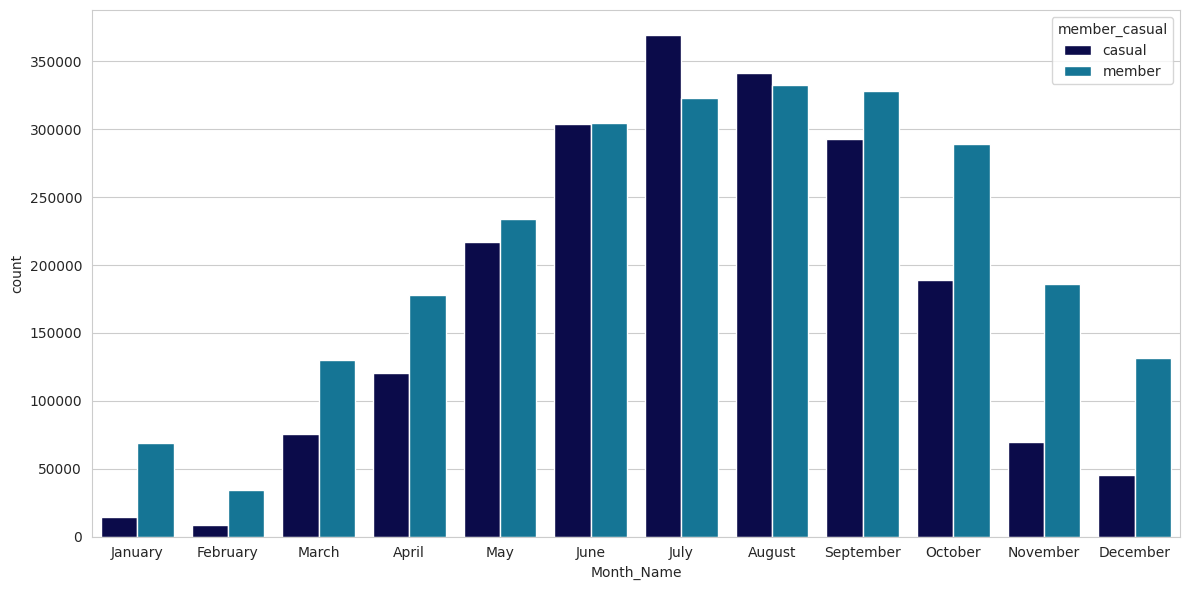

In [48]:
plt.figure(figsize=(12,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
sns.countplot(x='Month_Name', hue='member_casual', data=merged_df, palette='ocean', order=order)
plt.tight_layout()